In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import warnings
import time

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [4]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [10]:
df = pd.read_csv(os.path.join("data", "transformed.csv"))

In [5]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,is_travelling_in_group,Age_bucket,HomePlanet_Orig,Destination_Orig,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,False,30.0,Europa,TRAPPIST-1e,False,True,False,False,False,True
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,False,20.0,Earth,TRAPPIST-1e,True,False,False,False,False,True
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,True,50.0,Europa,TRAPPIST-1e,False,True,False,False,False,True
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,True,30.0,Europa,TRAPPIST-1e,False,True,False,False,False,True
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,False,10.0,Earth,TRAPPIST-1e,True,False,False,False,False,True


# Data Analyse

In [6]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TicketId,InvidualId,Deck,Num,Side,Num_bucket,Total spendings,Age_bucket
count,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000,8689.000000
mean,0.363103,28.742088,0.023478,217.478891,443.144223,168.290769,302.154114,295.075175,4633.370008,1.518011,4.299689,600.086546,0.504891,551.570952,1407.069858,24.320405
std,0.480922,14.365433,0.151425,651.119099,1581.436928,595.686589,1118.029906,1122.724452,2671.356444,1.054425,1.780470,512.107590,0.500005,511.452750,2788.444311,14.401072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2318.000000,1.000000,3.000000,167.000000,0.000000,100.000000,0.000000,20.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4631.000000,1.000000,5.000000,426.000000,1.000000,400.000000,703.000000,20.000000
75%,1.000000,37.000000,0.000000,48.000000,77.000000,27.000000,62.000000,49.000000,6883.000000,2.000000,6.000000,998.000000,1.000000,900.000000,1388.000000,30.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,7.000000,1894.000000,1.000000,1800.000000,35987.000000,70.000000


In [7]:
df.select_dtypes(exclude=object).corrwith(df["Transported"]).sort_values()

RoomService                 -0.240535
Spa                         -0.216606
VRDeck                      -0.202352
Total spendings             -0.195489
HomePlanet_Earth            -0.168670
Deck                        -0.116973
Destination_TRAPPIST-1e     -0.096133
Age                         -0.073249
Age_bucket                  -0.071778
Num                         -0.046843
Num_bucket                  -0.045605
VIP                         -0.037645
Destination_PSO J318.5-22    0.002343
ShoppingMall                 0.009168
HomePlanet_Mars              0.018315
TicketId                     0.021237
FoodCourt                    0.043328
InvidualId                   0.066294
Side                         0.102248
Destination_55 Cancri e      0.106784
is_travelling_in_group       0.113629
HomePlanet_Europa            0.176726
CryoSleep                    0.444048
Transported                  1.000000
dtype: float64

Firstly, people in Cryosleep were much more likely to survive.

CryoSleep  Transported
0          False          3674
           True           1860
1          True           2517
           False           638
Name: count, dtype: int64


<Axes: xlabel='CryoSleep', ylabel='count'>

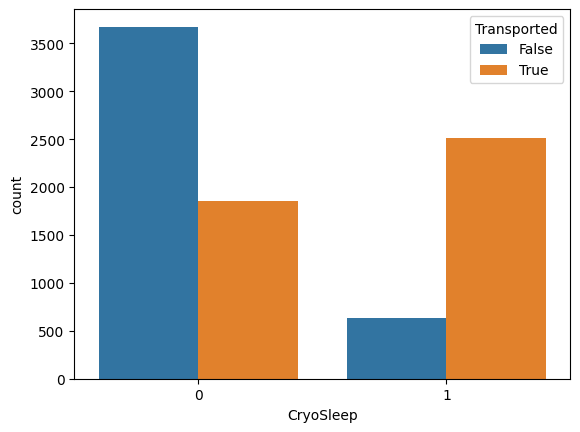

In [8]:
print(df.groupby("CryoSleep")["Transported"].value_counts())
sns.countplot(x="CryoSleep", hue="Transported", data=df)

<Axes: xlabel='HomePlanet_Orig', ylabel='count'>

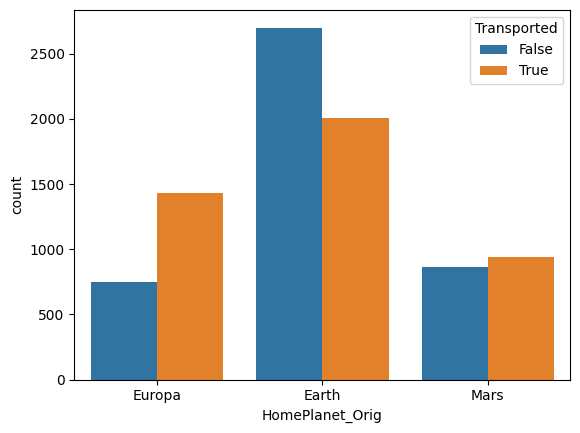

In [9]:
sns.countplot(x="HomePlanet_Orig", hue="Transported", data=df)

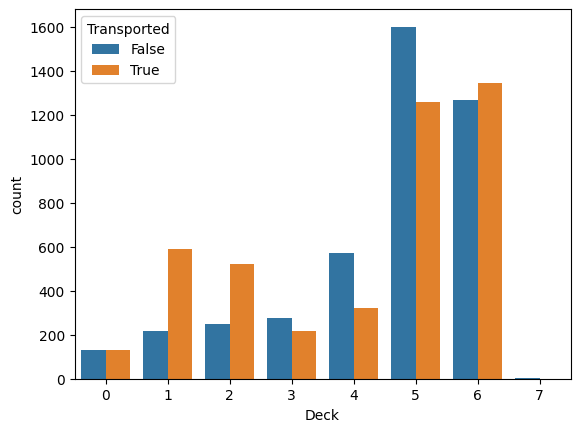

In [10]:
ax = sns.countplot(x="Deck", hue="Transported", data=df, legend=True)
sns.move_legend(ax, "upper left")

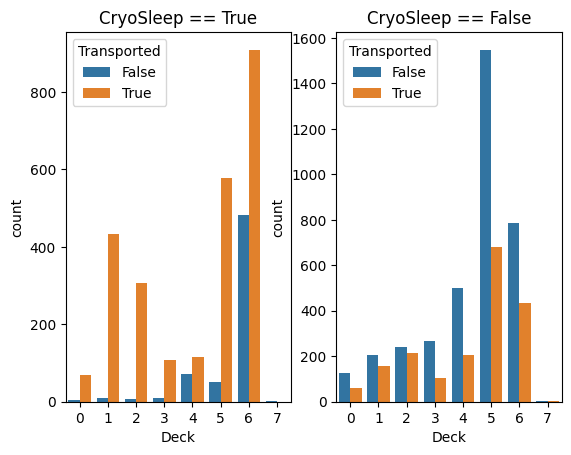

In [11]:
fig, ax = plt.subplots(1, 2)

sns.countplot(x="Deck", hue="Transported", data=df[df["CryoSleep"] == True], legend=True, ax=ax[0]).set(title='CryoSleep == True')
sns.move_legend(ax[0], "upper left")

sns.countplot(x="Deck", hue="Transported", data=df[df["CryoSleep"] == False], legend=True, ax=ax[1]).set(title='CryoSleep == False')
sns.move_legend(ax[1], "upper left")

I've already knew, that people in Cryosleep were more likely to survive. Although, on decks 0-3 (actually A-D) almost none of of those people died (maybe evacuation started on higher decks??)

<Axes: xlabel='Age', ylabel='Count'>

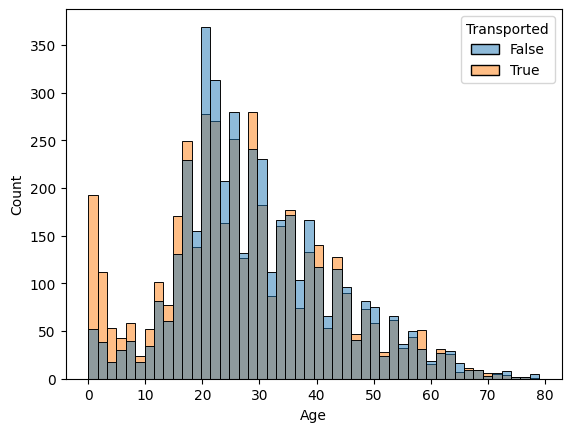

In [12]:
sns.histplot(x="Age", hue="Transported", data=df, legend=True)

In [13]:
df[df["Age"] < 18]["Transported"].value_counts(normalize=True)

Transported
True     0.629773
False    0.370227
Name: proportion, dtype: float64

Age doesn't seem to be so important factor, excluding fact, that 63% of children were saved.

<Axes: xlabel='Destination_Orig', ylabel='count'>

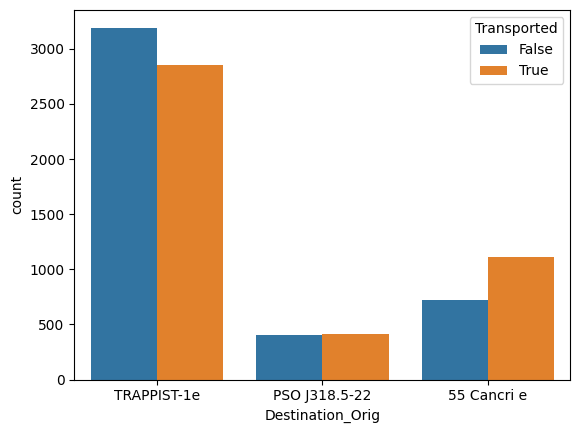

In [14]:
sns.countplot(x="Destination_Orig", hue="Transported", data=df)

I think that Home Planet is much more important than destination. As I found out in data_engineering notebook, passenger's deck is correlated with their home planet. We can clearly see, that higher decks (without passengers from Earth) have higher survivability rate. On the other hand, destinations of passenger are more randomly distributed among decks, so it doesn't have so big impact on survivability.

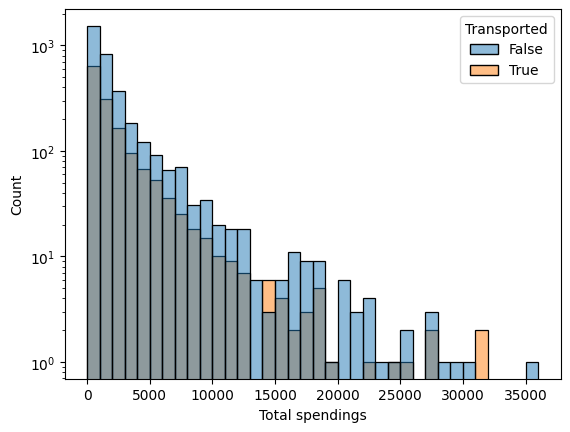

In [15]:
g = sns.histplot(x="Total spendings", hue="Transported", data=df[df["Total spendings"] > 0], legend=True, binwidth=1000)
g.axes.set_yscale('log')

Suprisingly, rich passengers didn't have bigger chances to survive. Actually, people who spend 0 had the highest survavibility rate - many of them were in cryosleep though.

<Axes: xlabel='Side', ylabel='count'>

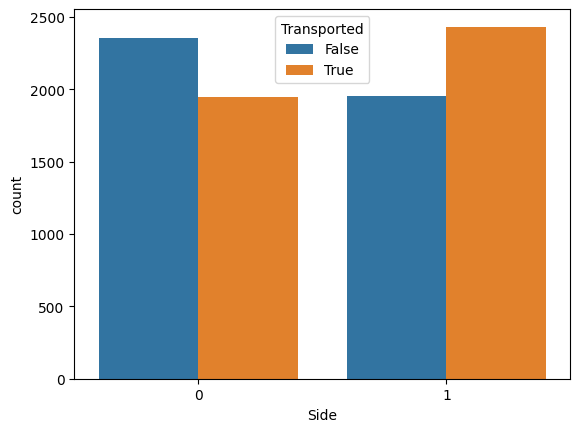

In [16]:
sns.countplot(x="Side", hue="Transported", data=df)

<Axes: xlabel='Num', ylabel='Count'>

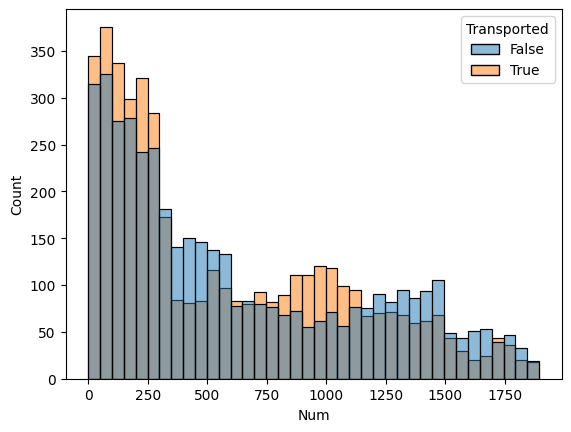

In [17]:
sns.histplot(x="Num", hue="Transported", data=df, binwidth=50)

In [18]:
df.groupby("Deck")["Num"].aggregate([min, max])

C:\Users\Marcin\AppData\Local\Temp\ipykernel_12196\3220369322.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby("Deck")["Num"].aggregate([min, max])
C:\Users\Marcin\AppData\Local\Temp\ipykernel_12196\3220369322.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("Deck")["Num"].aggregate([min, max])


,min,max
Deck,,
0,0,107
1,0,353
2,0,342
3,0,295
4,0,608
5,0,1894
6,0,1508
7,0,3


Number of room has some important information. In range 0-300 survivability is bigger, because small numbers on room exists on every deck. On higher decks survivability was bigger, so it's pretty good explanation for that. Though I can't see any cause, that survivability was bigger in num range 750-1100. 

<Axes: xlabel='is_travelling_in_group', ylabel='count'>

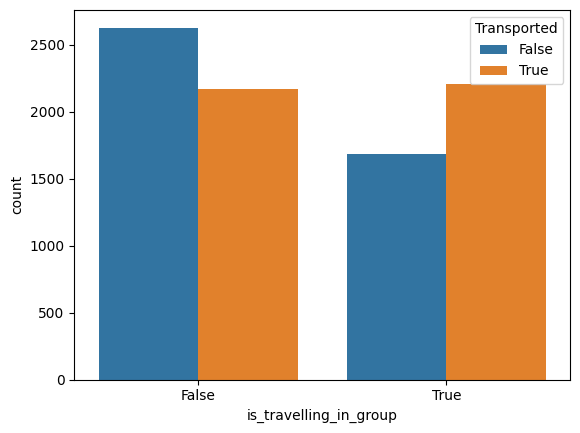

In [19]:
sns.countplot(x="is_travelling_in_group", hue="Transported", data=df)

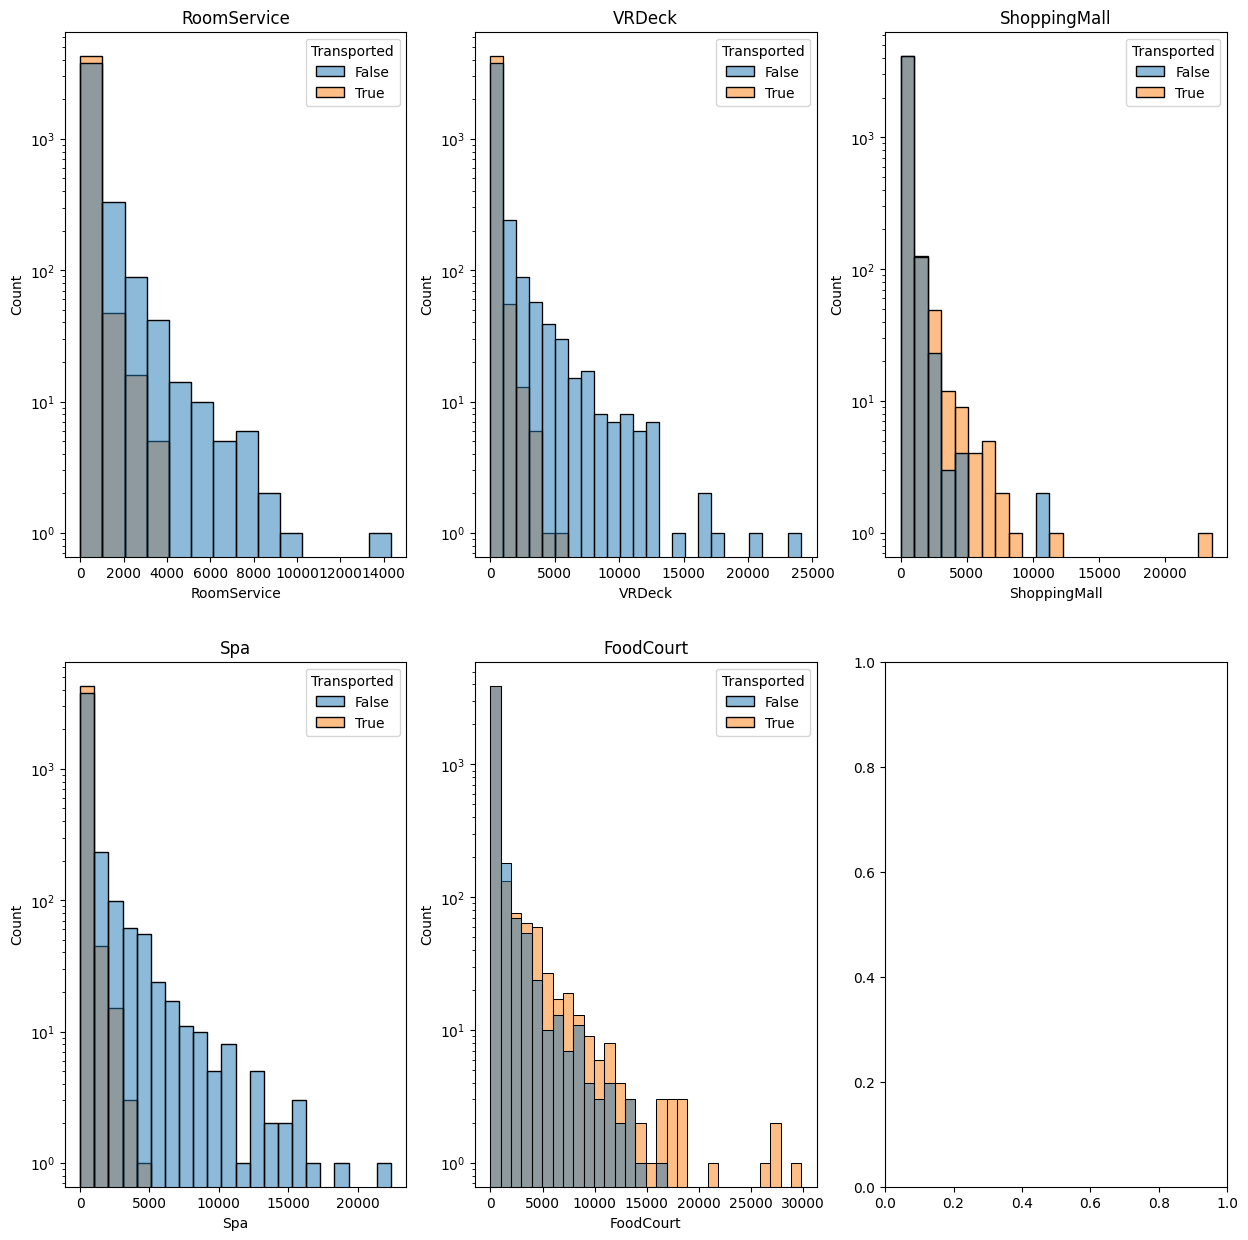

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
i = 0

expenses_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for col in expenses_columns:
    sns.histplot(x=col, hue="Transported", data=df[df[col] >= 0], legend=True, binwidth=1000, ax=ax[i%2][i%3]).set(title=col)
    ax[i%2][i%3].set_yscale('log')
    i += 1

### Calculating feature importance

https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [21]:
X = df.drop(columns="Transported").select_dtypes(exclude=object)
y = df["Transported"]

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
print(fit.scores_)
features = fit.transform(X)

[2.13359048e+03 4.68606502e+01 1.23280870e+01 5.33470524e+02
 1.63388314e+01 7.30150961e-01 4.27641668e+02 3.70886415e+02
 3.91985648e+00 3.83472382e+01 1.20510769e+02 1.91035166e+01
 9.17788088e+01 1.81050590e+01 3.45174307e+02 1.13629898e+02
 4.49873830e+01 2.54378847e+02 2.80059493e+02 2.91501067e+00
 1.00198012e+02 4.76927194e-02 8.10306890e+01]


In [22]:
features_importance = list(zip(fit.scores_, X.columns))
features_importance.sort(key=lambda x: x[0], reverse=True)
features_importance

[(2133.5904791096373, 'CryoSleep'),
 (533.4705236468603, 'RoomService'),
 (427.641668209784, 'Spa'),
 (370.8864152039498, 'VRDeck'),
 (345.17430713188725, 'Total spendings'),
 (280.05949269230086, 'HomePlanet_Europa'),
 (254.37884727719398, 'HomePlanet_Earth'),
 (120.51076919981327, 'Deck'),
 (113.62989766490999, 'is_travelling_in_group'),
 (100.19801181754842, 'Destination_55 Cancri e'),
 (91.77880875791242, 'Side'),
 (81.03068897690602, 'Destination_TRAPPIST-1e'),
 (46.86065021594419, 'Age'),
 (44.987382983636614, 'Age_bucket'),
 (38.34723822829941, 'InvidualId'),
 (19.10351655091006, 'Num'),
 (18.105058968001455, 'Num_bucket'),
 (16.338831406659033, 'FoodCourt'),
 (12.328086979445207, 'VIP'),
 (3.919856476002795, 'TicketId'),
 (2.915010668649771, 'HomePlanet_Mars'),
 (0.730150961090615, 'ShoppingMall'),
 (0.04769271935461321, 'Destination_PSO J318.5-22')]

### Choose variables
I calculated feature importance using SelectKBase. The highest score had CryoSleep column. This is consistent with my analysis. Next highest columns are some kind of expenses. I didn't find those columns important by myself. Only some columns describing home and destination plant were rated high. It seems OK for me, because I found myself that for some of those distribution of survivability is rather even.

After calculating feature importance and doing my own analysis, I chosed variables to pass to ML algorithms. Those are:
- CryoSleep
- Num
- Side
- Deck
- HomePlanet_Europa
- HomePlanet_Earth
- Age
- is_travelling_in_group 
- Total spendings

I also prepare second set of columns, that consist of all of the above and RoomService, Spa and VRDeck columns 

In [11]:
df_a = df[["CryoSleep", "Num", "Side", "Deck", "HomePlanet_Europa", "HomePlanet_Earth", 
          "Age", "is_travelling_in_group", "Total spendings", "Transported"]].sample(frac=1).reset_index(drop=True)
df_b = df[["CryoSleep", "Num", "Side", "Deck", "HomePlanet_Europa", "HomePlanet_Earth", "Age", "is_travelling_in_group", "Total spendings",
                 "Spa", "RoomService", "VRDeck", "Transported"]].sample(frac=1).reset_index(drop=True)

In [12]:
y_a = df_a["Transported"]
X_a = df_a.drop(columns=["Transported"])

y_b = df_b["Transported"]
X_b = df_b.drop(columns=["Transported"])

# Predictions - stage 1

Here I'm gonna compare some classification algorithms on my data. For stage 2 I want to choose:
- the best algorithm
- the best set of columns

I'm gonna compare some selected algorithms using cross-validation technique.

In [25]:
warnings.filterwarnings('ignore') 

In [26]:
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(random_state=1),
    LinearSVC(random_state=1),
    GaussianNB(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    SGDClassifier(),
    LogisticRegression()
]

Calculation with A set of columns

In [27]:
np.random.seed(7777)

In [28]:
X = X_a
y = y_a
for clf in classifiers:
    start = time.time()
    score = cross_val_score(clf, X, y, cv=5)
    stop = time.time()
    print(f"{clf.__class__.__name__}. \nMean score: {score.mean():.4f}. Min score: {score.min():.4f}. Max score: {score.max():.4f}.")
    print(f"Time: {stop-start}s")
    print()

KNeighborsClassifier. 
Mean score: 0.6878. Min score: 0.6793. Max score: 0.6939.
Time: 0.31200098991394043s

SVC. 
Mean score: 0.7279. Min score: 0.7168. Max score: 0.7365.
Time: 6.820527076721191s

LinearSVC. 
Mean score: 0.4961. Min score: 0.3734. Max score: 0.6128.
Time: 1.100728988647461s

GaussianNB. 
Mean score: 0.7120. Min score: 0.6997. Max score: 0.7209.
Time: 0.02000141143798828s

DecisionTreeClassifier. 
Mean score: 0.6795. Min score: 0.6640. Max score: 0.6979.
Time: 0.1529998779296875s

AdaBoostClassifier. 
Mean score: 0.7344. Min score: 0.7237. Max score: 0.7422.
Time: 1.058051586151123s

RandomForestClassifier. 
Mean score: 0.7317. Min score: 0.7116. Max score: 0.7509.
Time: 4.498141288757324s

SGDClassifier. 
Mean score: 0.7055. Min score: 0.6851. Max score: 0.7399.
Time: 0.12399816513061523s

LogisticRegression. 
Mean score: 0.7200. Min score: 0.7100. Max score: 0.7267.
Time: 0.2138807773590088s



Calculation with B set of columns

In [13]:
X = X_b
y = y_b

In [29]:
for clf in classifiers:
    start = time.time()
    score = cross_val_score(clf, X, y, cv=5)
    stop = time.time()
    print(f"{clf.__class__.__name__}. \nMean score: {score.mean():.4f}. Min score: {score.min():.4f}. Max score: {score.max():.4f}.")
    print(f"Time: {stop-start}s")
    print()

KNeighborsClassifier. 
Mean score: 0.7611. Min score: 0.7555. Max score: 0.7675.
Time: 0.36099958419799805s

SVC. 
Mean score: 0.7836. Min score: 0.7756. Max score: 0.7917.
Time: 5.6963396072387695s

LinearSVC. 
Mean score: 0.6682. Min score: 0.6126. Max score: 0.7497.
Time: 1.2138004302978516s

GaussianNB. 
Mean score: 0.6790. Min score: 0.6701. Max score: 0.6824.
Time: 0.019001483917236328s

DecisionTreeClassifier. 
Mean score: 0.7313. Min score: 0.7227. Max score: 0.7394.
Time: 0.18563556671142578s

AdaBoostClassifier. 
Mean score: 0.7857. Min score: 0.7716. Max score: 0.7962.
Time: 1.2571566104888916s

RandomForestClassifier. 
Mean score: 0.7889. Min score: 0.7819. Max score: 0.7963.
Time: 4.555629253387451s

SGDClassifier. 
Mean score: 0.7520. Min score: 0.7117. Max score: 0.7917.
Time: 0.08899974822998047s

LogisticRegression. 
Mean score: 0.7835. Min score: 0.7704. Max score: 0.7894.
Time: 0.23330187797546387s



Conclusions:
 - Using data from column set B let me achieve higher score
 - Best algorithms got scores at around 78-79%.
 - The best score was achieved by RandomForestClassifier classifier. The drawback is long execution time.
 - SVC achieves very good score, but it tooks even more time to execute.
 - AdaBoost also had similar score and it works 3-4 times faster.
 - LogisticRegression algorithm also achieves similar performence and is the fastest among algorithms with score bigger than 78%. It's 4 times faster than AdaBoost.
 - LinearSVC have very big difference between the worse and the best score in crossvalidation.

I choose RandomFosterClassifier, AdaBoostClassifier, SVC and Logistic Regression for further examination.  

# Predictions - stage 2
I try to find params that let me achieve the highest scores. I choose hyperparamethers to examine mostly by this page: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [30]:
def print_top(search, n):
    means = search.cv_results_['mean_test_score']
    stds = search.cv_results_['std_test_score']
    params = search.cv_results_['params']

    means = np.nan_to_num(means)

    zipped = sorted(zip(means, stds, params), key=lambda x: x[0], reverse=True)

    for m, s, p in zipped[:n]:
        print(f"{m} ({s}) - {p}")


### Random Forest

In [31]:
clf = RandomForestClassifier()
params = dict(
    n_estimators=[100, 200, 500],
    criterion = ["gini", "entropy", "log_loss"],
    max_features = ['sqrt', 'log2', 10, 0.5, None]
)
cv = RandomizedSearchCV(clf, params, random_state=0)
search = cv.fit(X, y)

In [32]:
search.best_score_

0.7898500317664744

In [33]:
search.cv_results_["mean_test_score"]

array([0.78754761, 0.78340485, 0.78397983, 0.78950434, 0.78639607,
       0.78731693, 0.78536112, 0.78524558, 0.78490036, 0.78985003])

In [34]:
print_top(search, 5)

0.7898500317664744 (0.00500194540273862) - {'n_estimators': 200, 'max_features': 'sqrt', 'criterion': 'log_loss'}
0.7895043436264662 (0.002870305724676197) - {'n_estimators': 200, 'max_features': 'log2', 'criterion': 'gini'}
0.7875476083057903 (0.0029552730014429066) - {'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'log_loss'}
0.7873169287152366 (0.0045419491867922076) - {'n_estimators': 200, 'max_features': 0.5, 'criterion': 'entropy'}
0.7863960653296259 (0.003068873426667997) - {'n_estimators': 200, 'max_features': 0.5, 'criterion': 'gini'}


In [37]:
clf = RandomForestClassifier(n_estimators=200)
params = dict(
    criterion = ["gini", "log_loss"],
    max_features = ['sqrt', 'log2']
)
cv = GridSearchCV(clf, params)
search = cv.fit(X, y)

print_top(search, 5)

0.7920363204419084 (0.007289865473273232) - {'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7918060383463413 (0.007190382911425928) - {'criterion': 'log_loss', 'max_features': 'log2'}
0.7913455404043718 (0.004197917322238298) - {'criterion': 'gini', 'max_features': 'sqrt'}
0.7900799163670548 (0.005682106300751952) - {'criterion': 'gini', 'max_features': 'log2'}


The best set of parameters: {'n_estimators': 200, 'criterion': 'log_loss', 'max_features': 'sqrt'}

### Logistic Regression
Because execution time of logistic regression is very fast I was able to perform exhausting grid search. I got best score at around 79%.

In [31]:
clf = LogisticRegression()
params = dict(
    solver=["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    penalty=["none", "l1", "l2", "elasticnet"],
    C=[100, 10, 1, 0.1, 0.01]
)
cv = GridSearchCV(clf, params, cv=5)
search = cv.fit(X, y)

In [32]:
search.best_score_

0.7890437131861676

In [33]:
print_top(search, 5)

0.7890437131861676 (0.00923672550178682) - {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.7884681404455786 (0.007534567565072815) - {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7872019864149463 (0.007038454898849268) - {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.7866269436676729 (0.006558503853467871) - {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7859363623776294 (0.00589686349516534) - {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:
clf = LogisticRegression()
params = dict(
    solver=["newton-cg", "liblinear"],
    penalty=["l1", "l2"],
    C=[0.01, 0.001]
)
cv = GridSearchCV(clf, params, cv=5)
search = cv.fit(X, y)

In [35]:
print_top(search, 5)

0.7890437131861676 (0.00923672550178682) - {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.7884681404455786 (0.007534567565072815) - {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7872019864149463 (0.007038454898849268) - {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.7821379665348971 (0.006698236364189081) - {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.7798362718150218 (0.007629729616703697) - {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


The best set of parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

### SVC

In [31]:
clf = SVC()
params = dict(
    kernel=["poly", "rbf", "sigmoid"], # linear is very slow
    C=[1, 0.1, 0.01, 0.001]
)
cv = RandomizedSearchCV(clf, params, cv=5, n_iter=10, random_state=0, n_jobs=6)
search = cv.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.577 total time=   0.9s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.578 total time=   1.0s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.560 total time=   1.0s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.571 total time=   1.0s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.564 total time=   0.9s
[CV 1/5] END ...........C=0.001, kernel=sigmoid;, score=0.535 total time=   1.4s
[CV 2/5] END ...........C=0.001, kernel=sigmoid;, score=0.519 total time=   1.5s
[CV 3/5] END ...........C=0.001, kernel=sigmoid;, score=0.530 total time=   1.4s
[CV 4/5] END ...........C=0.001, kernel=sigmoid;, score=0.521 total time=   1.4s
[CV 5/5] END ...........C=0.001, kernel=sigmoid;, score=0.526 total time=   1.4s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.758 total time=   1.1s
[CV 2/5] END .................C=0.1, kernel=rbf;

In [32]:
print_top(search, 5)

0.7822529750843519 (0.00911986849969932) - {'kernel': 'rbf', 'C': 1}
0.7680972511234202 (0.009663518890672133) - {'kernel': 'rbf', 'C': 0.1}
0.6908711301378712 (0.012469846277326758) - {'kernel': 'rbf', 'C': 0.01}
0.6077793081334761 (0.007688535929613592) - {'kernel': 'poly', 'C': 0.1}
0.5801572490166967 (0.007203160424468985) - {'kernel': 'sigmoid', 'C': 0.01}


In [38]:
clf = SVC(kernel="rbf")
params = dict(
    C=[1000, 100, 1, 0.1, 0.01, 0.001]
)
cv = GridSearchCV(clf, params, cv=5, n_jobs=6)
search = cv.fit(X, y)

In [39]:
print_top(search, 5)

0.7842091804117121 (0.006159073675591646) - {'C': 1000}
0.7836338064186166 (0.006026250600196733) - {'C': 1}
0.7832885820227592 (0.0059317530661726035) - {'C': 100}
0.7670619091816705 (0.00662059144671173) - {'C': 0.1}
0.6930593400390738 (0.006464706613389558) - {'C': 0.01}


### Adaboost

In [40]:
clf = AdaBoostClassifier()
params = dict(
    n_estimators=[50,100,200],
    learning_rate=[0.5, 1, 2],
    algorithm=["SAMME", "SAMME.R"]
)
cv = RandomizedSearchCV(clf, params, cv=5, n_jobs=6)
search = cv.fit(X, y)

In [43]:
print_top(search, 5)

0.7861667769715255 (0.004203583221198883) - {'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
0.7857072727670222 (0.008509831543071718) - {'n_estimators': 50, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
0.7854762619306465 (0.0027997112049168126) - {'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME.R'}
0.7743132114746203 (0.00542854193321911) - {'n_estimators': 200, 'learning_rate': 1, 'algorithm': 'SAMME'}
0.7683285932056181 (0.00705429304771372) - {'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME'}


In [44]:
clf = AdaBoostClassifier(algorithm="SAMME.R")
params = dict(
    n_estimators=[50,100,200],
    learning_rate=[0.8, 0.9, 1, 1.1],
)
cv = RandomizedSearchCV(clf, params, cv=5, n_jobs=6)
search = cv.fit(X, y)

In [45]:
print_top(search, 5)

0.788584010234171 (0.0038901470938753476) - {'n_estimators': 100, 'learning_rate': 0.8}
0.7874333947463088 (0.006370594262989713) - {'n_estimators': 100, 'learning_rate': 0.9}
0.7868577557565555 (0.007788288559837427) - {'n_estimators': 50, 'learning_rate': 1.1}
0.7865121338657117 (0.005101730184878219) - {'n_estimators': 50, 'learning_rate': 0.8}
0.7861667769715255 (0.004203583221198883) - {'n_estimators': 100, 'learning_rate': 1}


In [46]:
clf = AdaBoostClassifier(algorithm="SAMME.R", n_estimators=100)
params = dict(
    learning_rate=[0.6, 0.7, 0.75, 0.8, 0.9],
)
cv = GridSearchCV(clf, params, cv=5, n_jobs=6)
search = cv.fit(X, y)

In [47]:
print_top(search, 5)

0.7913458716501938 (0.00405323850088705) - {'learning_rate': 0.6}
0.788584010234171 (0.0038901470938753476) - {'learning_rate': 0.8}
0.7882391170841359 (0.005465521143821173) - {'learning_rate': 0.75}
0.7877785528930017 (0.004360656628882575) - {'learning_rate': 0.7}
0.7874333947463088 (0.006370594262989713) - {'learning_rate': 0.9}


In [49]:
for i in range(1, 6):
    dt = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(estimator=dt, algorithm="SAMME.R", n_estimators=100, learning_rate=0.6)

    score = cross_val_score(clf, X, y, cv=5)
    print(f"DecisionTree depth: {dt}. Score: {score.mean()}")


DecisionTree depth: DecisionTreeClassifier(max_depth=1). Score: 0.7913458716501938
DecisionTree depth: DecisionTreeClassifier(max_depth=2). Score: 0.7868576232582267
DecisionTree depth: DecisionTreeClassifier(max_depth=3). Score: 0.7828300053065581
DecisionTree depth: DecisionTreeClassifier(max_depth=4). Score: 0.7653364496940281
DecisionTree depth: DecisionTreeClassifier(max_depth=5). Score: 0.7442730578560578


In [51]:
for i in range(1, 6):
    dt = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(estimator=dt)
    params = dict(
        n_estimators=[10, 50,100,200],
        learning_rate=[0.6, 0.75, 0.9],
        algorithm=["SAMME.R"]
    )
    cv = RandomizedSearchCV(clf, params, cv=5, n_jobs=6)
    search = cv.fit(X, y)

    print(f"DecisionTree depth: {dt}")
    print_top(search, 3)
    print()

DecisionTree depth: DecisionTreeClassifier(max_depth=1)
0.7913458716501938 (0.00405323850088705) - {'n_estimators': 100, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.7885836789883487 (0.003301005752473148) - {'n_estimators': 200, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.7882391170841359 (0.005465521143821173) - {'n_estimators': 100, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}

DecisionTree depth: DecisionTreeClassifier(max_depth=2)
0.7931877309197437 (0.004905962392628164) - {'n_estimators': 50, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.790655555356808 (0.0044153602109550045) - {'n_estimators': 50, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}
0.7868576232582267 (0.0063808092922737125) - {'n_estimators': 100, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}

DecisionTree depth: DecisionTreeClassifier(max_depth=3)
0.7890436469370029 (0.005713221362543097) - {'n_estimators': 10, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}
0.7872023839099329 (0.0042876175316662445) - {

Conclusion:
- All classifiers achieved similar performance - at around 78%-79% accuracy
- Drawback of SVC is longer execution time, while performance is similar.
- Two classifiers achieved performance over 79%: RandomForest and AdaBoost with DecisionTree as an estimator. Both of them are rather quickly.

### Do normalization of variables gives better accuracy?

In [52]:
from sklearn.preprocessing import normalize
X_norm = normalize(X)


In [55]:
for i in range(1, 6):
    dt = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(estimator=dt)
    params = dict(
        n_estimators=[10, 50,100,200],
        learning_rate=[0.6, 0.75, 0.9],
        algorithm=["SAMME.R"]
    )
    cv = RandomizedSearchCV(clf, params, cv=5, n_jobs=6)
    search = cv.fit(X_norm, y)

    print(f"DecisionTree depth: {dt}")
    print_top(search, 3)
    print()

DecisionTree depth: DecisionTreeClassifier(max_depth=1)
0.7872019201657819 (0.00429527937740406) - {'n_estimators': 200, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.786396529073777 (0.005036934172745791) - {'n_estimators': 100, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}
0.785821221329846 (0.0030697578918190897) - {'n_estimators': 200, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}

DecisionTree depth: DecisionTreeClassifier(max_depth=2)
0.7885832152441977 (0.0036705987294346288) - {'n_estimators': 50, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.7840944368589151 (0.003811242552287828) - {'n_estimators': 100, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.7837500737021955 (0.005762541593192365) - {'n_estimators': 10, 'learning_rate': 0.75, 'algorithm': 'SAMME.R'}

DecisionTree depth: DecisionTreeClassifier(max_depth=3)
0.7876620868619295 (0.006116677483275637) - {'n_estimators': 10, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}
0.7844391312614569 (0.004742491045244454) - {'n

### AdaBoost prediction and submission

In [14]:
from utils import data_transform_pipeline

data_transform_pipeline("test.csv")

df = pd.read_csv(os.path.join("data", "test_transformed.csv"))

X_test = df[["CryoSleep", "Num", "Side", "Deck", "HomePlanet_Europa", "HomePlanet_Earth", "Age", "is_travelling_in_group", "Total spendings",
                 "Spa", "RoomService", "VRDeck"]]
X_test.index = df["PassengerId"]

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
TicketId                   0
InvidualId                 0
LastName                  94
Deck                       0
Num                        0
Side                       0
Num_bucket                 0
Total spendings            0
Age_bucket                 0
is_travelling_in_group     0
dtype: int64


In [15]:
dt = DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(dt, **{'n_estimators': 50, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'})

clf.fit(X, y)
predict = clf.predict(X_test)

result = pd.DataFrame()
result["PassengerId"] = X_test.index
result["Transported"] = predict

In [16]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [17]:
result.to_csv(os.path.join("data", "20240119_adaboost.csv"), index=False)

Eventually, that model achieved 78.9% accuracy score on Kaggle. I would say that this is decent score, but I'd like to go over 80%. I'm gonna read other peoples notebooks and I'll try improve my solution.

### Random forest prediction and submission

In [19]:
clf = RandomForestClassifier(**{'n_estimators': 200, 'criterion': 'log_loss', 'max_features': 'sqrt'})

clf.fit(X, y)
predict = clf.predict(X_test)

result = pd.DataFrame()
result["PassengerId"] = X_test.index
result["Transported"] = predict

In [20]:
result.to_csv(os.path.join("data", "20240119_randomforest.csv"), index=False)

This submission got 78.7% accuracy score.